In [51]:
import os

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [52]:
def normalize(data, min_val=-50, max_val=50):
    return (data - min_val) / (max_val - min_val)

# Load your complete dataset
train_x = np.load("train_x.npy")
train_y = np.load("train_y.npy")
test_x = np.load("test_x.npy")
test_y = np.load("test_y.npy")

# Ensure x has shape (num_samples, 8, 8, 1)
if train_x.ndim == 3:
    train_x = np.expand_dims(train_x, axis=-1)
    test_x = np.expand_dims(test_x, axis=-1)
elif train_x.shape[-1] == 2:
    train_x = train_x[:, :, :, 0:1]  # Keep only the first channel if it's (8, 8, 1)
    test_x = test_x[:, :, :, 0:1]

In [53]:
# Print shapes to verify
print("Final train_x shape:", train_x.shape)
print("Final train_y shape:", train_y.shape)
print("Final test_x shape:", test_x.shape)
print("Final test_y shape:", test_y.shape)

Final train_x shape: (80000, 8, 8, 1)
Final train_y shape: (80000, 1)
Final test_x shape: (20000, 8, 8, 1)
Final test_y shape: (20000, 1)


In [54]:
train_x = np.load("train_x.npy")
print(train_x[:10].reshape(-1, 8, 8))
print(train_x.shape)

[[[-1.  0.  0.  0.  3.  0.  0.  0.]
  [-1.  0.  0.  0. -1. -1.  1. -1.]
  [ 0.  0. -1.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0. -1. -1.  0.  0.]
  [ 1. -1.  0.  0. -1.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0. -1.  0. -1.  0.  0. -1. -1.]
  [ 0.  0.  0.  0.  0.  0.  1.  0.]]

 [[ 0.  0. -1.  3.  0.  0.  0.  0.]
  [ 0.  0. -1.  0.  0.  0.  0.  0.]
  [ 0.  1.  1.  0.  0.  0.  1.  1.]
  [ 0.  0. -1.  0. -1.  0.  0.  0.]
  [-1.  0.  0.  0.  0.  1.  0.  0.]
  [ 0. -1. -1.  1.  0. -1.  0.  0.]
  [ 0.  0.  0. -1.  0.  0. -1.  0.]
  [ 0.  0. -3. -3.  0.  0.  0. -3.]]

 [[ 0.  0. -1.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0. -1.  0.  0.  0.]
  [ 0. -1.  0.  0.  0. -1.  0.  0.]
  [ 1.  1.  0. -1.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  1. -1.]
  [-1.  0.  0. -1.  0.  0.  0.  0.]
  [ 1.  0.  0.  0. -1. -1.  0.  0.]
  [ 0.  0.  0.  0.  0.  0. -3. -3.]]

 [[ 0.  0.  3.  0.  3.  0.  0. -1.]
  [-1.  0. -1. -1.  0.  0. -1.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  1.  0.  0.  0.

In [55]:
train_y = np.load('train_y.npy')
train_y

array([[0.245],
       [0.27 ],
       [0.225],
       ...,
       [0.325],
       [0.21 ],
       [0.625]], dtype=float16)

In [56]:
model = models.Sequential()

model.add(layers.Input(shape=(8, 8, 1)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))


In [57]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

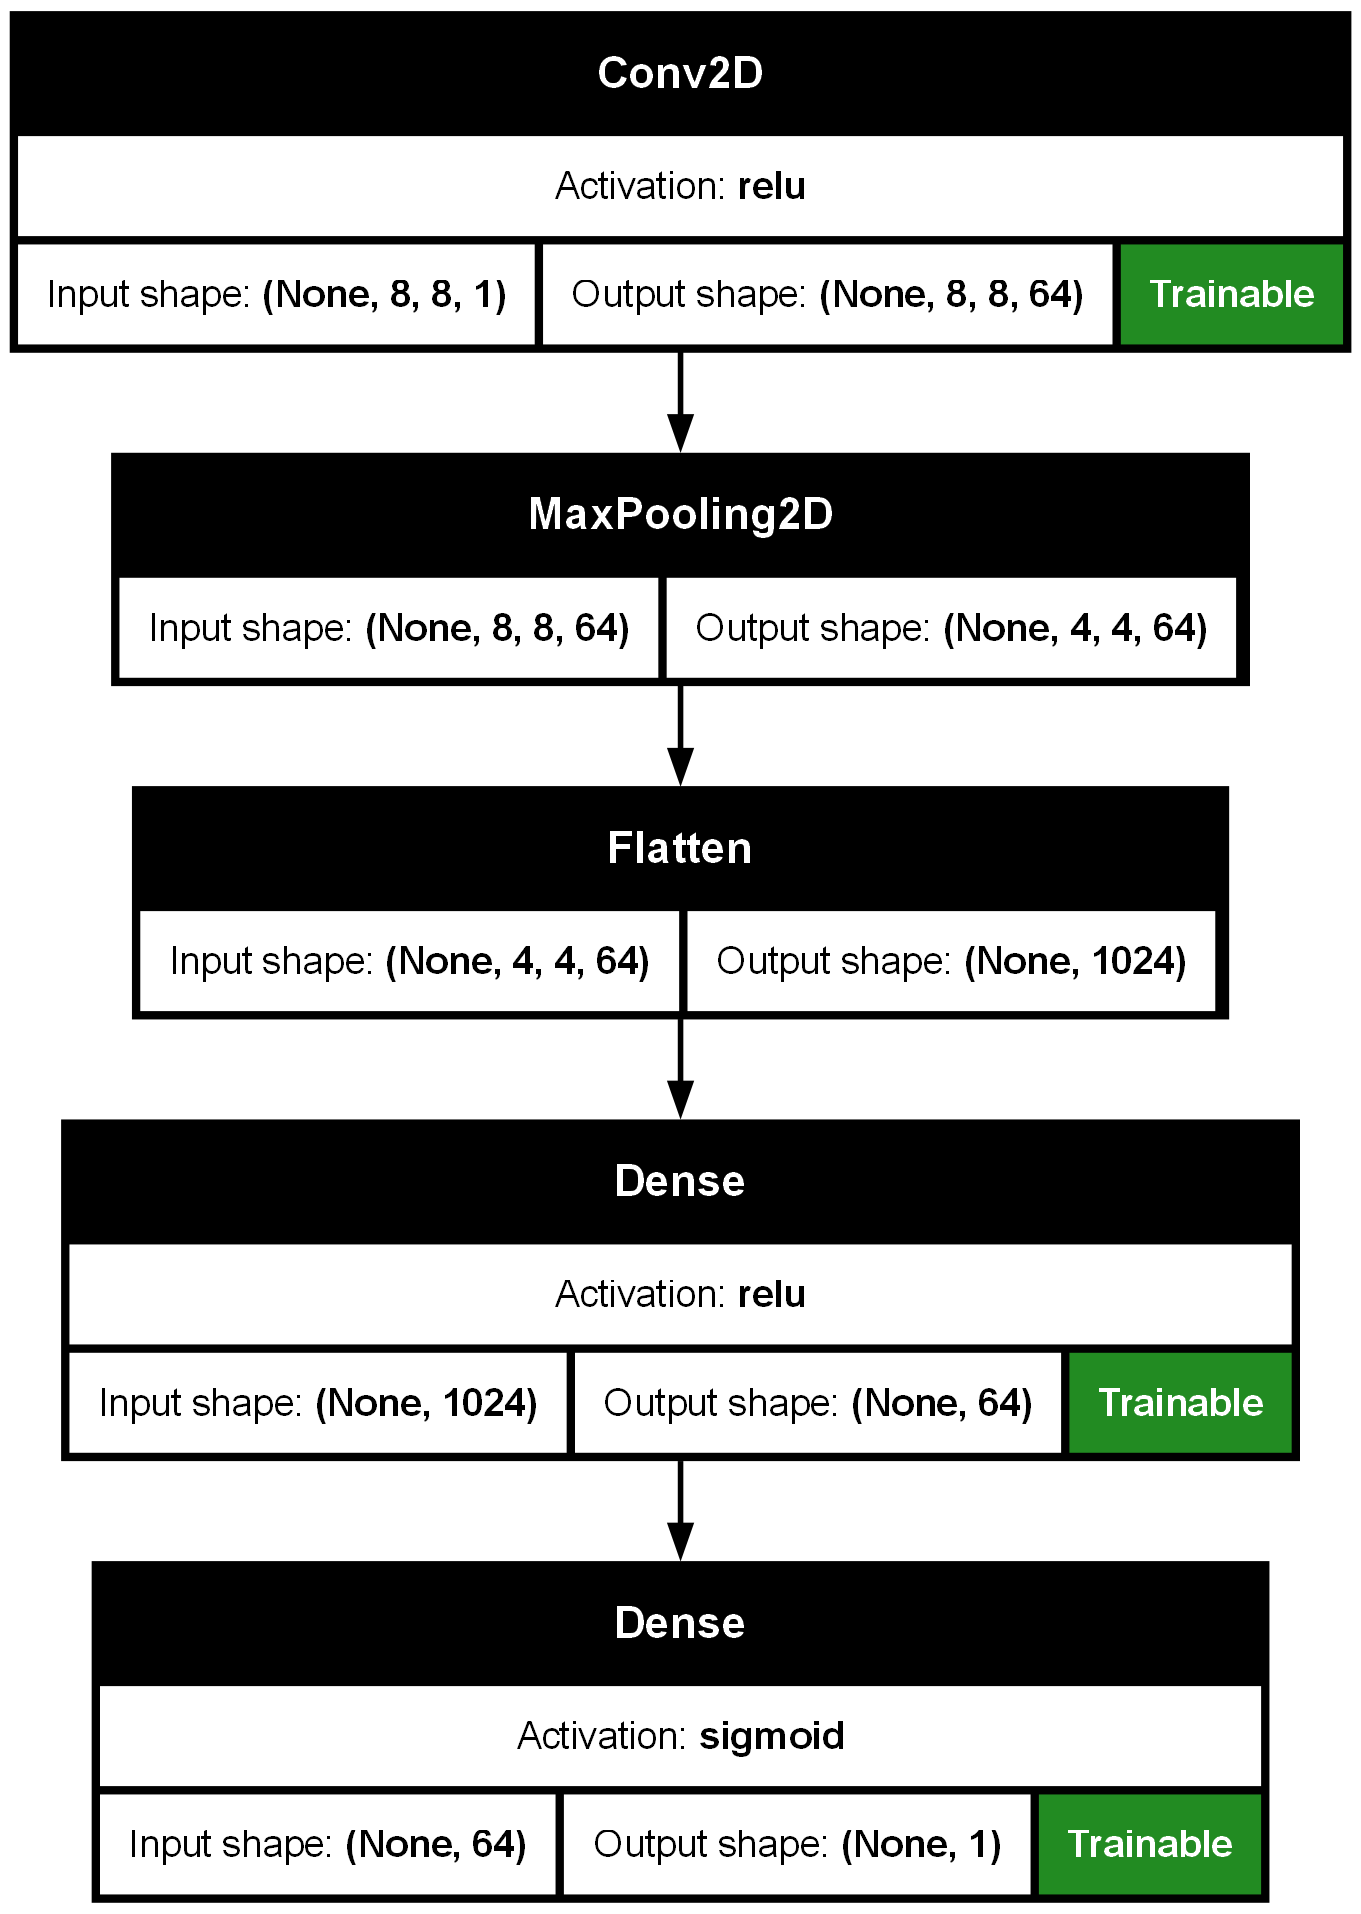

In [58]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,
)


In [59]:
history = model.fit(train_x, train_y, epochs=32, batch_size=64, validation_split=0.2)

Epoch 1/32
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0021 - mae: 0.0268 - val_loss: 1.8792e-04 - val_mae: 0.0102
Epoch 2/32
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6174e-04 - mae: 0.0095 - val_loss: 1.0444e-04 - val_mae: 0.0076
Epoch 3/32
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0411e-04 - mae: 0.0077 - val_loss: 7.2579e-05 - val_mae: 0.0063
Epoch 4/32
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.0346e-05 - mae: 0.0068 - val_loss: 6.8559e-05 - val_mae: 0.0062
Epoch 5/32
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.9522e-05 - mae: 0.0063 - val_loss: 6.4815e-05 - val_mae: 0.0061
Epoch 6/32
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.8625e-05 - mae: 0.0057 - val_loss: 5.1703e-05 - val_mae: 0.0055
Epoch 7/32
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.3015e-05 - mae: 0.0054 - val_loss: 4.6758e-05 - val_mae: 0.0050
Epoch 8/32
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.4532e-05 - mae: 0.0050 - val_loss: 7.1317e-0

In [60]:
test_x = np.load('test_x.npy')
test_y = np.load('test_y.npy')

In [61]:
loss, mae = model.evaluate(test_x, test_y)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - loss: 1.9981e-05 - mae: 0.0033


In [62]:
predictions = model.predict(test_x)
# predictions = normalize(predictions)
predictions

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step


array([[0.1437205 ],
       [0.5834118 ],
       [0.7474505 ],
       ...,
       [0.6209303 ],
       [0.83645093],
       [0.5776038 ]], dtype=float32)

In [63]:
# test_y = normalize(test_y)
test_y

array([[0.14 ],
       [0.58 ],
       [0.75 ],
       ...,
       [0.62 ],
       [0.835],
       [0.58 ]], dtype=float16)

In [64]:
np.hstack((predictions, test_y))   #np.hstack((predictions, np.squeeze(test_y)))

array([[0.1437205 , 0.14001465],
       [0.5834118 , 0.5800781 ],
       [0.7474505 , 0.75      ],
       ...,
       [0.6209303 , 0.6201172 ],
       [0.83645093, 0.83496094],
       [0.5776038 , 0.5800781 ]], dtype=float32)

In [65]:
test_x[:5].reshape(-1, 8, 8)

array([[[ 0., -1.,  0., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  1.,  0.,  0.],
        [ 0., -1., -1.,  1.,  0., -1., -1.,  0.],
        [ 1., -1.,  0.,  0.,  0.,  0., -1.,  0.],
        [-1.,  1.,  0.,  0.,  0., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1., -1.,  0.],
        [ 1.,  0.,  0., -3., -3.,  0.,  0.,  0.]],

       [[-1.,  0.,  3.,  0.,  0., -1., -1.,  0.],
        [-1.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  1., -1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  1.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  1.,  0., -1.],
        [-3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  3.,  3.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  1., -1.,  1.],
        [ 0., -1.,  1.,  0.,  1.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0

In [66]:
model.save('my_model.keras')  # creates a HDF5 file 'my_model.h5'

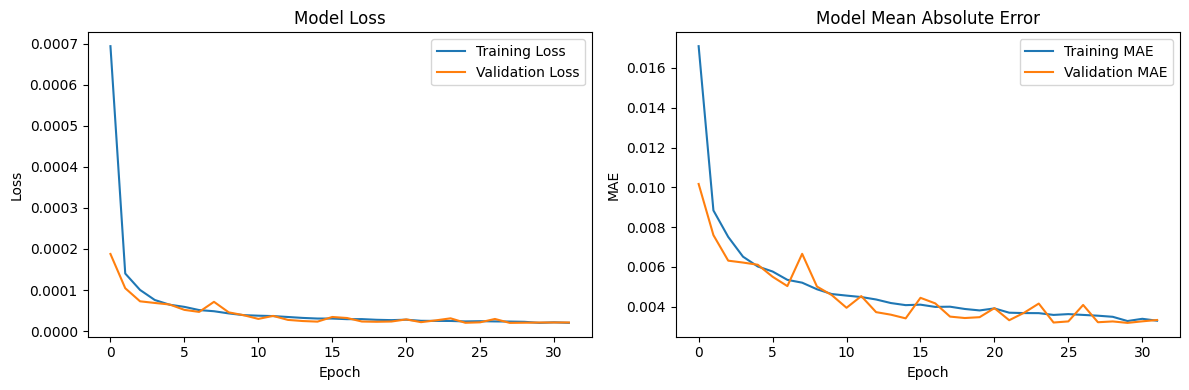

In [67]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [68]:
import numpy as np
mse = np.mean((predictions - test_y) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.090924135700334e-05


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step
(20000, 1)
(20000, 1)
Combined data_x shape: (20000, 8, 8, 1)
Combined data_y shape: (20000, 1)
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step
train_x shape: (80000, 8, 8, 1)
train_y shape: (80000,)


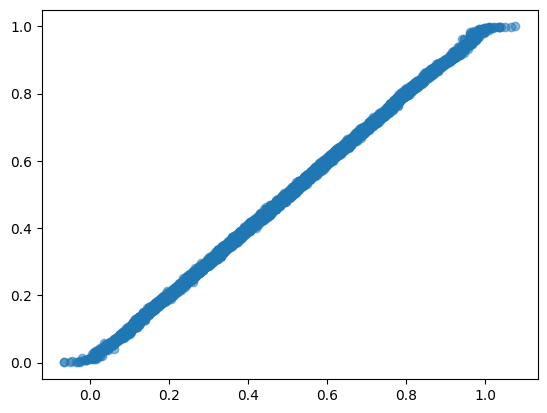

In [69]:
''' bu kisim onemli cunku assagidaki kodlarin calismasini sagliyor, emreye sormam gerek bu kismi tam emin degilim bende'''

train_x = train_x.reshape(-1, 8, 8, 1)  # Reshape to (8824, 8, 8, 1)
train_y = train_y.reshape(-1)           # Reshape to (8824,)

predictions = model.predict(test_x)
print(predictions.shape)  # Should match (test_y.shape[0],)
print(test_y.shape)

print("Combined data_x shape:", test_x.shape)  # Should be (99958, 8, 8, 1) or similar
print("Combined data_y shape:", test_y.shape)  # Should be (99958,)

predictions = model.predict(test_x).flatten()
plt.scatter(test_y, predictions, alpha=0.5)  # Ensure test_y and predictions are same length


# Print shapes to verify
print("train_x shape:", train_x.shape)  # Expecting (8824, 8, 8, 1)
print("train_y shape:", train_y.shape)  # Expecting (8824,)

In [70]:
base_position = test_x[0]
slightly_modified = base_position.copy()
slightly_modified[0, 0, 0] = 1 - slightly_modified[0, 0, 0]  # Flip one piece

base_prediction = model.predict(base_position[np.newaxis, ...])
modified_prediction = model.predict(slightly_modified[np.newaxis, ...])

print(f"Base prediction: {base_prediction[0][0]}")
print(f"Modified prediction: {modified_prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Base prediction: 0.14372053742408752
Modified prediction: 0.15395978093147278


In [71]:
test_loss, test_mae = model.evaluate(test_x, test_y, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss: 0.0000
Test MAE: 0.0033


In [72]:
# Example (adjust according to your board representation)
sample_board = np.random.randint(0, 2, (1, 8, 8, 1))
prediction = model.predict(sample_board)
print(f"Prediction for sample board: {prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction for sample board: 0.9999999403953552


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step


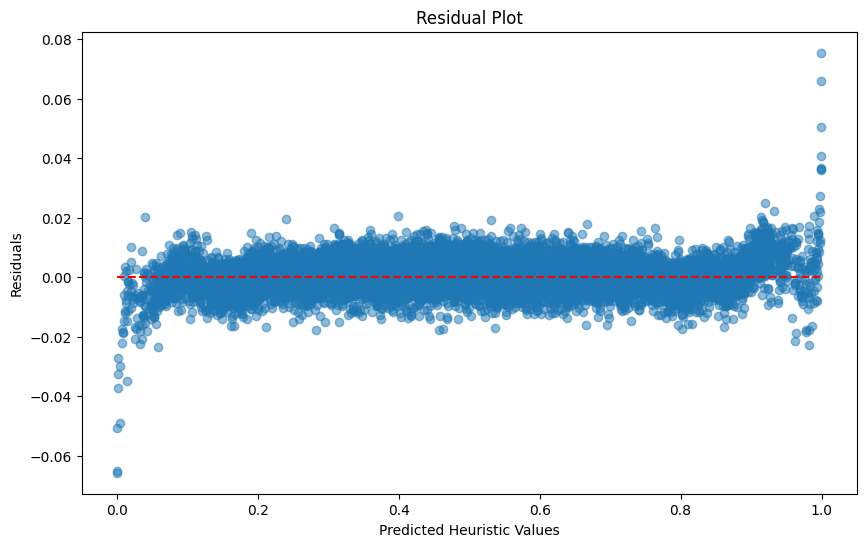

In [73]:
test_y_flat = test_y.flatten()
predictions = model.predict(test_x).flatten()
residuals = test_y_flat - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='r', linestyles='--')
plt.xlabel('Heuristic Values (from traditional evaluation)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step


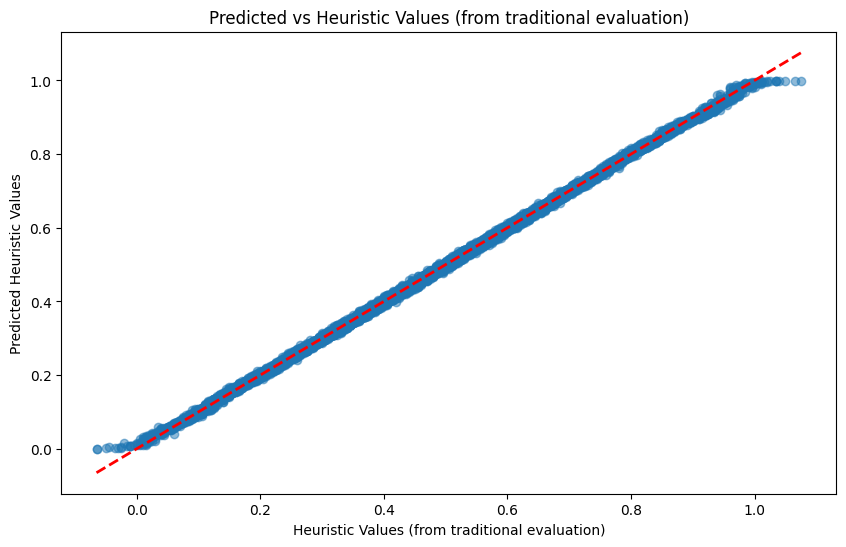

Correlation coefficient: 0.9998


In [76]:
predictions = model.predict(test_x).flatten()
plt.figure(figsize=(10, 6))
plt.scatter(test_y, predictions, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
plt.xlabel('Heuristic Values (from traditional evaluation)')
plt.ylabel('Predicted Heuristic Values')
plt.title('Predicted vs Heuristic Values (from traditional evaluation)')
plt.show()


# Calculate and print correlation coefficient
from scipy.stats import pearsonr
correlation, _ = pearsonr(test_y_flat, predictions)
print(f"Correlation coefficient: {correlation:.4f}")

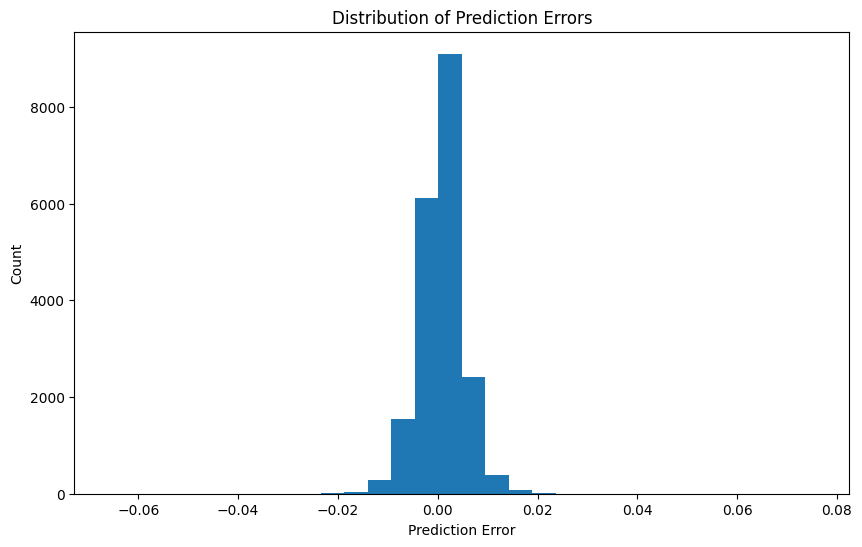

In [75]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.show()